# Segmentação de clientes para campanha de marketing
```Problema: A empresa Kamba Code está planejando uma nova campanha de marketing e, para direcioná-la de forma eficaz, precisa identificar os diferentes grupos de clientes presentes em sua base de dados. Para isso, foi sugerido o desenvolvimento de um algoritmo de agrupamento que permita segmentar os clientes de acordo com características semelhantes.```
### Importando os Pacotes

In [78]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

### Carregando o dataset

In [125]:
clientess_df=pd.read_csv('./Mall_Customers.csv')

clientess_df




,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [124]:
# Verificando valores nulos
clientess_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [129]:
# Selecionando colunas mais relevantes para o aggrupamento

X=clientess_df.iloc[:,[3,4]].values


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Escolhendo o melhor valor de K
### Método do Cotovelo

O **método do cotovelo** é uma técnica usada para determinar o número ideal de clusters (**K**) em algoritmos de agrupamento, como o **K-Means**. Ele ajuda a identificar o ponto em que aumentar o número de clusters deixa de trazer melhorias significativas na qualidade do agrupamento. O nome "cotovelo" vem da forma do gráfico gerado ao aplicar essa técnica, que se assemelha a um cotovelo.

### Como funciona o Método do Cotovelo:

### 1. Executar o K-Means para diferentes valores de K:

Inicialmente, você executa o algoritmo de K-Means várias vezes, variando o número de clusters (K) para cada execução. Isso pode ser feito, por exemplo, para valores de K de 1 a 10 ou mais.

### 2. Calcular a soma das distâncias ao centróide (Inércia ou Soma dos Erros Quadráticos - SSE):

```Para cada valor de K, calcula-se a **Soma dos Erros Quadráticos (SSE)** ou **Inércia**, que mede a soma das distâncias dos pontos de dados ao centróide de seus clusters correspondentes. Quanto menor essa soma, melhor o agrupamento (ou seja, os pontos estão mais próximos de seus centróides).```

### 3. Plotar um gráfico de K (número de clusters) versus SSE:

Depois de calcular o SSE para diferentes valores de K, você cria um gráfico em que o eixo **X** representa os valores de K, e o eixo **Y** representa o SSE.

### 4. Identificar o "cotovelo" no gráfico:

O gráfico geralmente mostra uma rápida queda no SSE à medida que o número de clusters aumenta, mas a partir de um certo ponto, essa diminuição começa a desacelerar. O ponto em que a curva começa a se "achatar" (formando um cotovelo) indica o número ideal de clusters. Isso acontece porque, além desse ponto, aumentar o número de clusters não reduz substancialmente a variabilidade dentro dos clusters.

## Exemplo prático:

Imagine que você tem um conjunto de dados e decide executar o K-Means com K variando de 1 a 10. Para cada valor de K, você calcula o SSE e plota o gráfico. Se o gráfico mostrar uma curva acentuada de redução de SSE para **K=1**, **K=2**, e **K=3**, mas a partir de **K=4** o decréscimo começa a se estabilizar, então o ponto "cotovelo" é **K=3**. Isso significa que três clusters é o número ideal, pois adicionar mais clusters não melhora significativamente a separação dos dados.


In [131]:
# Método do cotovelo

sdq=[]

for k in range(1,11):
    '''
    n_clusters=k: Define o número de clusters que o algoritmo tentará identificar. Isso varia a cada iteração do loop.

    init='k-means++': Este método inicializa os centróides de forma mais eficiente. Em vez de escolher centróides aleatoriamente, o k-means++ tenta escolher pontos que estão mais distantes uns dos outros, ajudando na convergência mais rápida e melhorando a qualidade do agrupamento.
    
    random_state=42: Ao definir um valor específico para random_state, você garante que o algoritmo produza os mesmos resultados em execuções subsequentes. Isso é crucial em cenários de pesquisa e desenvolvimento, onde você pode precisar apresentar resultados consistentes ou comparar diferentes configurações.
    Com random_state=42, Sempre que você executar o código, os centróides iniciais e, portanto, os resultados do agrupamento serão os mesmos
    '''
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
    kmeans.fit(X)
    sdq.append(kmeans.inertia_)
    

In [132]:
sdq

[269981.28,
 185917.1425392852,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 38858.959975143895,
 31969.42655023547,
 29858.483597603947,
 22209.851608025543,
 20786.936692059156]

### Visualizando o gráxfico do cotovelo

Text(0, 0.5, 'SDQ')

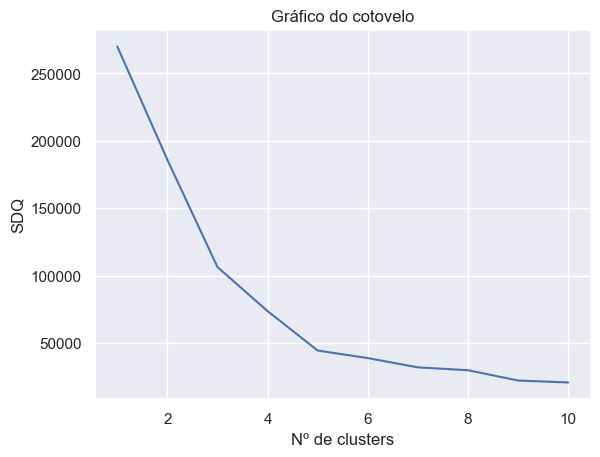

In [135]:
sns.set_theme()
plt.plot(range(1,11),sdq)
plt.title("Gráfico do cotovelo")
plt.xlabel("Nº de clusters")
plt.ylabel("SDQ")



### # O número óptimo do k é 5

In [137]:

# Treinando o modelo
kmeans=kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

# retornando o rótulo de cada cluster
y=kmeans.fit_predict(X)

y


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

### ⚡ Visualizando os cLusters

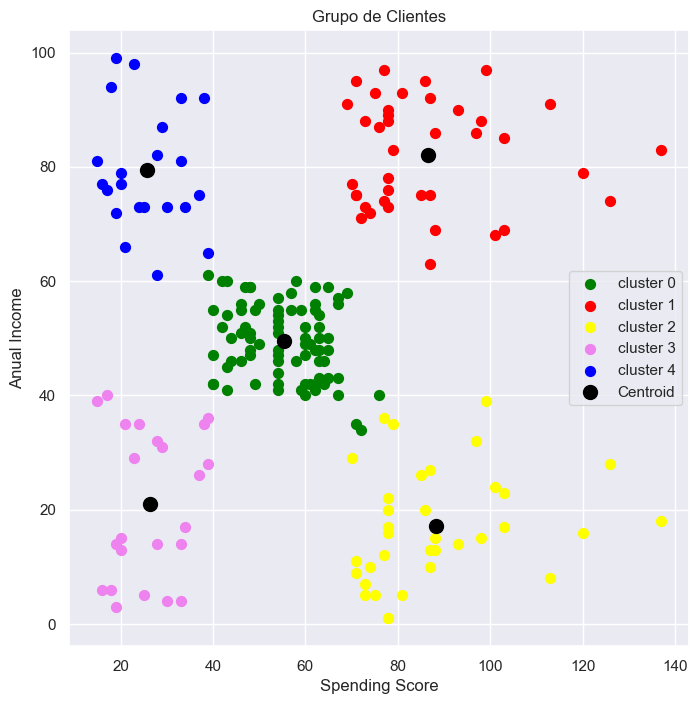

In [139]:
# visualizando todos clusters e seus centroides
plt.figure(figsize=(8,8))
plt.scatter(X[y==0,0],X[y==0,1],s=50,c="green",label="cluster 0")
plt.scatter(X[y==1,0],X[y==1,1],s=50,c="red",label="cluster 1")
plt.scatter(X[y==2,0],X[y==2,1],s=50,c="yellow",label="cluster 2")
plt.scatter(X[y==3,0],X[y==3,1],s=50,c="violet",label="cluster 3")
plt.scatter(X[y==4,0],X[y==4,1],s=50,c="blue",label="cluster 4")

#centroides
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100, c="black",label="Centroid")
plt.title('Grupo de Clientes')
plt.ylabel('Anual Income')
plt.xlabel('Spending Score')
plt.legend()

plt.show()

### Adicionando rótulo do cluster no nosso dataset

clientess_df

In [145]:
clientess_df['cluster']=kmeans.labels_
clientess_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [144]:
#f

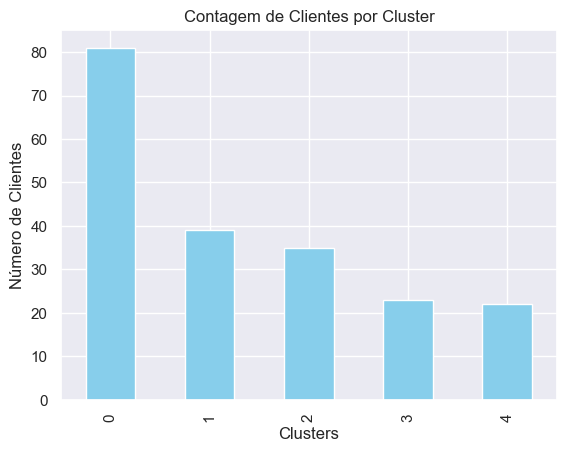

In [146]:
#contando quantos clientes existem em cada cluster
clientess_df['cluster'].value_counts().plot(kind='bar', color='skyblue')

# Adicionar título e rótulos aos eixos
plt.title('Contagem de Clientes por Cluster')
plt.xlabel('Clusters')
plt.ylabel('Número de Clientes')

# Exibir o gráfico
plt.show()